In [1]:
import numpy as np
import matplotlib.pyplot as mp
import re
import spec_funcs as sf
import fit_funcs as ff
from scipy.signal import fftconvolve

In [2]:
path = 'C:\\Users\\sk88\\Desktop\\Comp_sig\\COMP_UNF.csv'

time = []
amp = []

with open(path, 'r', newline='') as raw_file:
    for row in raw_file:
        if sf.check_str(row) == True:
            temp = re.split('\t|,|;', row)
            time.append(float(temp[0]))
            amp.append(float(temp[1]))

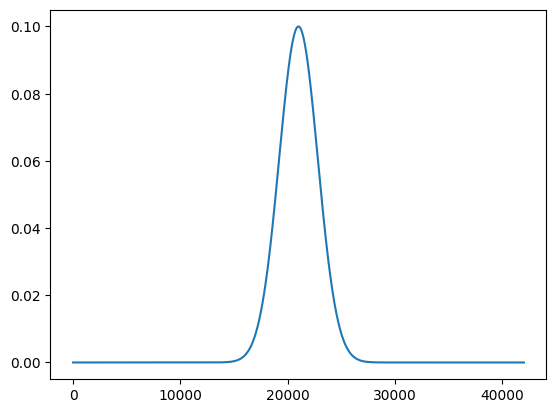

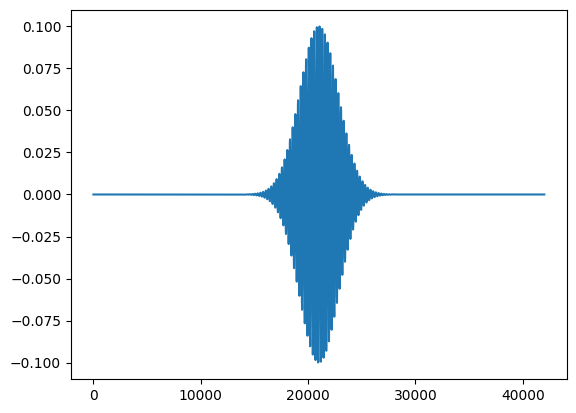

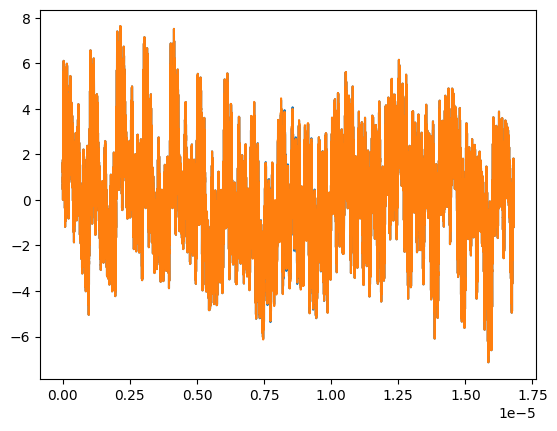

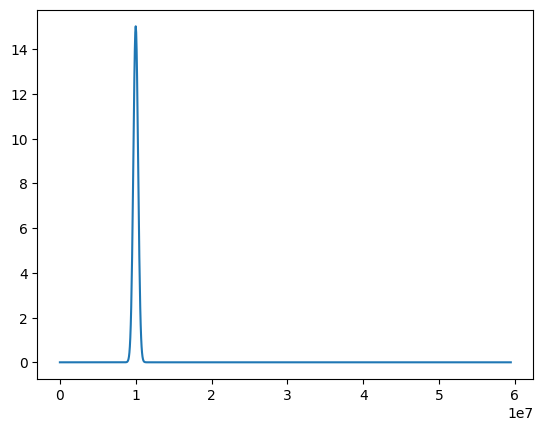

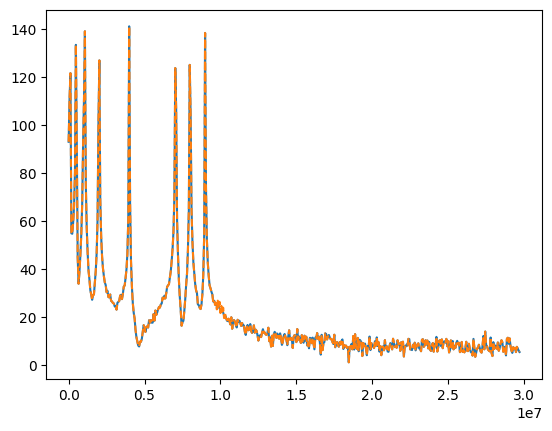

In [3]:
freq_list = [1*1E5, 5*1E5, 10*1E5, 10.5*1E5, 20*1E5, 40*1E5, 70.5*1E5, 80*1E5, 90*1E5, 10*1E7]
omega_list = [[2*np.pi*value] for value in freq_list]
N = 42000
T= 0.4E-9
test_time = np.linspace(0, N*T, N)
waves = [np.sin(omega*test_time) for omega in omega_list]
freq = sf.fftfreq(N, T)

gauss = ff.gaussian(np.arange(0, N), 0.1, 0, N/2, 1800)
hdyne = np.sin(2*np.pi*10*1E6*test_time)

mp.figure()
mp.plot(gauss)

echo = gauss * hdyne

mp.figure()
mp.plot(echo)

wave_sum = 0
for wave in waves:
    wave_sum += wave + np.random.normal(loc=0, scale=0.1, size=len(wave))

wave_echo = wave_sum + echo

mp.figure()
mp.plot(test_time, wave_sum)
mp.plot(test_time, wave_echo)
mp.figure()
mp.plot(freq[0:1000], np.sqrt(np.abs(sf.fft(echo)))[0:1000])

mp.figure()
mp.plot(freq[0:500], np.sqrt(np.abs(sf.fft(wave_sum)))[0:500])
mp.plot(freq[0:500], np.sqrt(np.abs(sf.fft(wave_echo)))[0:500], '--')

In [4]:
sampling_rate = 1/T
low_cut_off = 8*1E6
high_cut_off = 15*1E6
trans_band = 1000
b = trans_band/sampling_rate
lfc = low_cut_off/sampling_rate
hfc = high_cut_off/sampling_rate
M = int(np.ceil((4/b)))

lpf = ff.low_pass(M, lfc)
hpf = ff.high_pass(M, hfc)

In [5]:
low = len(lpf)
high = len(hpf)
band = len(bpf)

mp.figure()
mp.title('low pass')
mp.plot(lpf)
mp.figure()
mp.title('low pass')
mp.plot(np.sqrt(np.abs(sf.fft(lpf)))[0:low//2])

mp.figure()
mp.title('high pass')
mp.plot(hpf)
mp.figure()
mp.title('high pass')
mp.plot(np.sqrt(np.abs(sf.fft(hpf)))[0:high//2])

mp.figure()
mp.title('band pass')
mp.plot(bpf)
mp.figure()
mp.title('band pass')
mp.plot(np.sqrt(np.abs(sf.fft(bpf)))[0:band//2])

NameError: name 'bpf' is not defined

In [ ]:
# filter in the time domain
pad_lp = np.zeros(len(lpf) - 1)
padded_wave_lp = np.append(np.asarray(wave_sum), pad_lp)
pad_hp = np.zeros(len(hpf) - 1)
padded_wave_hp = np.append(np.asarray(wave_sum), pad_hp)
pad_wave_lp = np.zeros(len(wave_sum) - 1)
pad_wave_hp = np.zeros(len(wave_sum) - 1)
padded_wave_lpf = np.append(lpf, pad_wave_lp)
padded_wave_hpf = np.append(hpf, pad_wave_hp)

time_lp = fftconvolve(padded_wave_lpf, padded_wave_lp)
time_hp = fftconvolve(hpf, wave_sum)
time_bp = fftconvolve(bpf, wave_sum)

In [ ]:
# plots
mp.figure()
mp.title('time low pass')
mp.xlabel('time (s)')
mp.ylabel('intensity (AU)')
mp.plot(time_lp)

mp.figure()
mp.title('fft time low pass')
mp.xlabel('freq (Hz)')
mp.ylabel('intensity (AU)')
mp.plot(freq[0:5000], np.sqrt(np.abs(sf.ifft(time_lp)))[0:5000])

mp.figure()
mp.title('time high pass')
mp.xlabel('time (s)')
mp.ylabel('intensity (AU)')
mp.plot(time_hp)

mp.figure()
mp.title('fft time high pass')
mp.xlabel('freq (Hz)')
mp.ylabel('intensity (AU)')
mp.plot(freq[0:5000], np.sqrt(np.abs(sf.ifft(time_hp)))[0:5000])

mp.figure()
mp.title('time band pass')
mp.xlabel('time (s)')
mp.ylabel('intensity (AU)')
mp.plot(time_bp)

mp.figure()
mp.title('fft time band pass')
mp.xlabel('freq (Hz)')
mp.ylabel('intensity (AU)')
mp.plot(freq[0:5000], np.sqrt(np.abs(sf.ifft(time_bp)))[0:5000])

In [ ]:
# filter in the frequency domain
freq_hp = np.convolve(np.sqrt(np.abs(sf.fft(hpf))), wave_sum)
freq_lp = np.convolve(np.sqrt(np.abs(sf.fft(lpf))), wave_sum)

mp.figure()
mp.plot(np.sqrt(np.abs(sf.fft(hpf))))

mp.figure()
mp.title('time boxcar low')
mp.xlabel('time (s)')
mp.ylabel('intensity (AU)')
mp.plot(test_time[low:round(1.2*low)], freq_lp[low:round(1.2*low)])

mp.figure()
mp.title('fft boxcar low')
mp.xlabel('time (s)')
mp.ylabel('intensity (AU)')
mp.plot(freq[0:N//2], np.sqrt(np.abs(sf.ifft(freq_lp)))[0:N//2])

mp.figure()
mp.title('time boxcar high')
mp.xlabel('time (s)')
mp.ylabel('intensity (AU)')
mp.plot(test_time[high:round(1.2*high)], freq_hp[high:round(1.2*high)])

mp.figure()
mp.title('fft boxcar high')
mp.xlabel('freq (Hz)')
mp.ylabel('intensity (AU)')
mp.plot(freq[0:N//2], np.sqrt(np.abs(sf.fft(freq_hp)))[0:N//2])

In [ ]:
# pad arrays to do convolution in frequency space
pad_lp = np.zeros(len(lpf) - 1)
padded_wave_lp = np.append(np.asarray(wave_sum), pad_lp)
pad_hp = np.zeros(len(hpf) - 1)
padded_wave_hp = np.append(np.asarray(wave_sum), pad_hp)
pad_wave_lp = np.zeros(len(wave_sum) - 1)
pad_wave_hp = np.zeros(len(wave_sum) - 1)
padded_wave_lpf = np.append(lpf, pad_wave_lp)
padded_wave_hpf = np.append(hpf, pad_wave_hp)

pad_freq_lp = sf.fft(padded_wave_lpf) * sf.fft(padded_wave_lp)
pad_freq_hp = sf.fft(padded_wave_hpf) * sf.fft(padded_wave_hp)

In [ ]:
mp.figure()
mp.title('padded low pass')
mp.plot(sf.fft(pad_freq_lp)[0:10000])

mp.figure()
mp.title(' high pass')
mp.plot(time_hp[0:10000])

mp.figure()
mp.title('padded high pass')
mp.plot(sf.fft(pad_freq_hp)[0:10000])


In [ ]:
temp = [[],[]]
print(temp)
temp.append([])
print(temp)